In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import FormatStrFormatter

df_2month = pd.read_csv('merged_df_des_jan.csv')
df_1month = pd.read_csv('merged_df_feb.csv')

In [2]:
def calculate_rmse(predictions, actual_values):
    error = actual_values - predictions
    squared_error = error ** 2
    mse = squared_error.mean()
    rmse = np.sqrt(mse)
    return rmse


In [3]:
# Membaca data frame dari file CSV
merged_df_des_jan = pd.read_csv('merged_df_des_jan.csv')

# Pemilihan fitur dan target
features = merged_df_des_jan[['AT_10', 'AT_28']]
target = merged_df_des_jan['AT_1028']

# Pembagian data menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Dictionary untuk menyimpan model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}


# Melatih dan melakukan prediksi untuk setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Melakukan prediksi pada data bulan Februari
    features_feb = pd.read_csv('merged_df_feb.csv')[['AT_10', 'AT_28']]
    predictions_feb = model.predict(features_feb)

    # Menambah kolom hasil prediksi ke dalam data frame
    df_1month[f'AT_1028_{name.replace(" ", "_")}'] = predictions_feb

# Menyimpan data frame yang telah diprediksi ke dalam file CSV
df_1month.to_csv('merged_df_feb_predicted_all_models.csv', index=False)


In [4]:
def calculate_and_print_rmse(model_name, predicted_column, actual_column):
    df = pd.read_csv('merged_df_feb_predicted_all_models.csv')
    rmse = calculate_rmse(df[predicted_column], df[actual_column])
    print(f'{model_name} RMSE: {rmse}')
    return rmse

In [5]:
# Dictionary untuk menyimpan nilai RMSE
rmse_values = {}
rmse_values['Linear Regression'] = calculate_and_print_rmse('Linear Regression', 'AT_1028_Linear_Regression', 'AT_1028')
rmse_values['Random Forest'] = calculate_and_print_rmse('Random Forest', 'AT_1028_Random_Forest', 'AT_1028')
rmse_values['Decision Tree'] = calculate_and_print_rmse('Decision Tree', 'AT_1028_Decision_Tree', 'AT_1028')
rmse_values['K-Nearest Neighbors'] = calculate_and_print_rmse('K-Nearest Neighbors', 'AT_1028_K-Nearest_Neighbors', 'AT_1028')

Linear Regression RMSE: 1.1698475175770764
Random Forest RMSE: 1.1686763436123209
Decision Tree RMSE: 1.1691282859920917
K-Nearest Neighbors RMSE: 1.1708489474632309


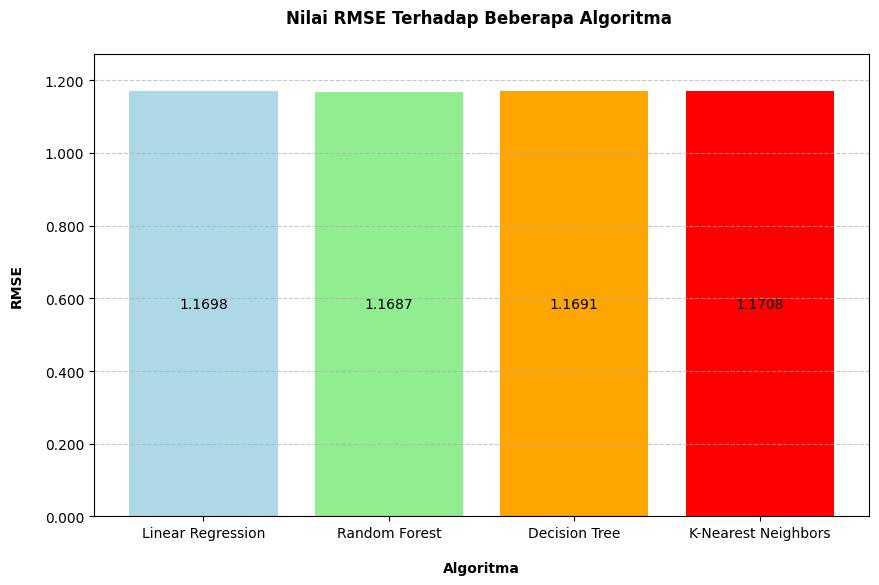

In [6]:
# Mengambil nama model dan nilai RMSE dari dictionary
model_names = list(rmse_values.keys())
rmse_scores = list(rmse_values.values())

# Membuat diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color=['lightblue', 'lightgreen', 'orange', 'red'])
plt.xlabel('Algoritma', labelpad=15, fontweight='bold')
plt.ylabel('RMSE', labelpad=15, fontweight='bold')
plt.title('Nilai RMSE Terhadap Beberapa Algoritma ', y=1.05, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Menambahkan nilai RMSE di tengah setiap balok
for bar, rmse in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{rmse:.4f}', ha='center', va='center', color='black')

# Menyesuaikan batas y-axis dan format sumbu y
max_rmse = max(rmse_scores)
plt.ylim(0, max_rmse + 0.1)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.show()

In [7]:
# Membaca file CSV
data = pd.read_csv('merged_df_feb_predicted_all_models.csv')

# Mengakses kolom 'AT_1028'
at_1028_column = data['AT_1028']

# Menghitung Range Data
max_data = max(at_1028_column)
min_data = min(at_1028_column)
data_range = max_data - min_data

# Dictionary untuk menyimpan RMSE Percentage
rmse_percentage_values = {}

# Menghitung RMSE Percentage untuk setiap model
for model, rmse in rmse_values.items():
    rmse_percentage = (rmse / data_range) * 100
    rmse_percentage_values[model] = rmse_percentage
    print(f'RMSE Percentage ({model}): {rmse_percentage:.2f}%')

RMSE Percentage (Linear Regression): 10.45%
RMSE Percentage (Random Forest): 10.43%
RMSE Percentage (Decision Tree): 10.44%
RMSE Percentage (K-Nearest Neighbors): 10.45%


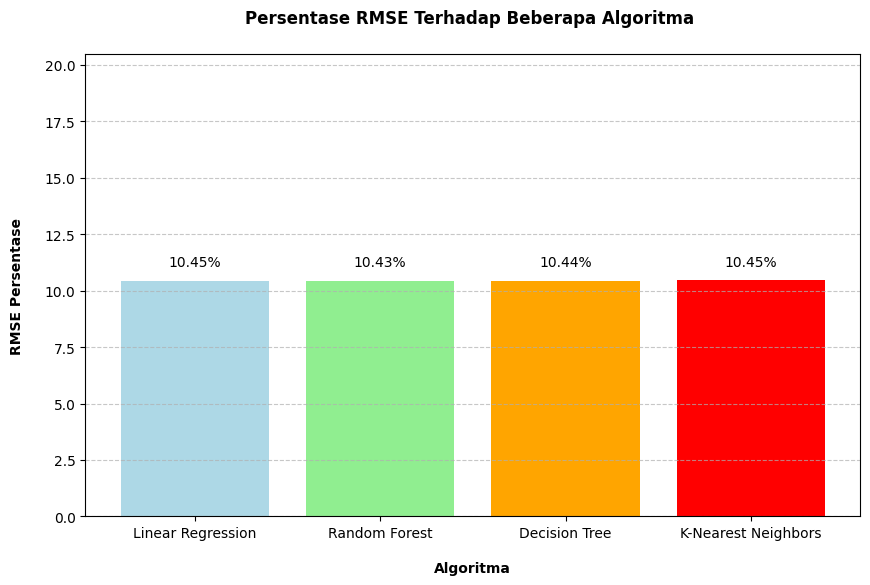

In [8]:
# Membuat tabel batang
plt.figure(figsize=(10, 6))
plt.bar(rmse_percentage_values.keys(), rmse_percentage_values.values(), color=['lightblue', 'lightgreen', 'orange', 'red'])
plt.xlabel('Algoritma', labelpad=15, fontweight='bold')
plt.ylabel('RMSE Persentase', labelpad=15, fontweight='bold')
plt.title('Persentase RMSE Terhadap Beberapa Algoritma ', y=1.05, fontweight='bold')
plt.ylim(0, max(rmse_percentage_values.values()) + 10)  # Sesuaikan batas atas sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan persentase RMSE pada batang
for model, rmse_percentage in rmse_percentage_values.items():
    plt.text(model, rmse_percentage + 0.5, f'{rmse_percentage:.2f}%', ha='center', va='bottom')

# Menampilkan plot
plt.show()